In [2]:
import numpy as np
import pandas as pd
import csv
import mysql.connector
from datetime import date, datetime
import random
import time
import matplotlib.pyplot as plt

import ipdb

In [102]:
class Lotofacil:
    def __init__(self):
        self.id = 0
        self.data_sorteio = None
        self.ganhadores_15_numeros = 0
        self.valor_rateio_15_numeros = 0
        self.valor_rateio_14_numeros = 0
        self.valor_rateio_13_numeros = 0
        self.valor_rateio_12_numeros = 0
        self.valor_rateio_11_numeros = 0
        self.numeros = ()
        self.par = 0
        self.impar = 0
        self.sequencia = ()
        self.vertical = ()
        self.horizontal = ()
        
    def set_numeros(self, numeros):
        self.numeros = tuple(numeros)
        self.setParImpar()
        self.set_sequencia()
        self.set_horizontal()
        self.set_vertical()
        
    def set_sequencia(self):
        sequencia = []
        count = []

        sequencia.append(self.numeros[0])
        
        for i in np.arange(1, len(self.numeros)):
            if (self.numeros[i] - self.numeros[i-1] == 1):
                sequencia.append(self.numeros[i])
                
                if (i < len(self.numeros) - 1):
                    continue
                
            if (len(sequencia) > 1):
                count.append(len(sequencia))

            sequencia = []
            sequencia.append(self.numeros[i])
            
        self.sequencia = tuple(count)
        
    def setParImpar(self):
        self.par = sum([1 if x % 2 == 0 else 0 for x in self.numeros])
        self.impar = len(self.numeros) - self.par
        
    def set_horizontal(self):
        quantidade = []
        horizontal = np.arange(1,26)
        horizontal = np.reshape(horizontal, (5,5))
        
        for h in horizontal:
            quantidade.append(len(set(h).intersection(self.numeros)))
            
        self.horizontal = tuple(quantidade)
        
    def set_vertical(self):
        quantidade = []
        vertical = np.arange(1,26)
        vertical = np.reshape(vertical, (5,5)).transpose()
        
        for v in vertical:
            quantidade.append(len(set(v).intersection(self.numeros)))
            
        self.vertical = tuple(quantidade)
        

In [4]:
class Jogo:
    def __init__(self):
        self.id = None
        self.data_cadastro = None
        self.quantidade = 0
        self.numeros = ()
        self.par = 0
        self.impar = 0
        self.sequencia = ()
        self.vertical = ()
        self.horizontal = ()
        
#     def sorteio(self, qtdNumeros = 15):
#         self.numeros = sorted(tuple(np.random.choice(np.arange(1, 26), qtdNumeros, replace= False)))
#         self.setQuantidade()
#         self.setParImpar()
        
#     def setQuantidade(self):
#         self.quantidade = len(self.numeros)

    def set_numeros(self, numeros):
        self.numeros = tuple(numeros)
        self.setParImpar()
        self.set_sequencia()
        self.set_horizontal()
        self.set_vertical()
        
    def setParImpar(self):
        self.par = sum([1 if x % 2 == 0 else 0 for x in self.numeros])
        self.impar = len(self.numeros) - self.par
        
    def set_sequencia(self):
        sequencia = []
        count = []

        sequencia.append(self.numeros[0])
        
        for i in np.arange(1, len(self.numeros)):
            if (self.numeros[i] - self.numeros[i-1] == 1):
                sequencia.append(self.numeros[i])
                
                if (i < len(self.numeros) - 1):
                    continue
                
            if (len(sequencia) > 1):
                count.append(len(sequencia))

            sequencia = []
            sequencia.append(self.numeros[i])
            
        self.sequencia = tuple(count)
        
    def set_horizontal(self):
        quantidade = []
        horizontal = np.arange(1,26)
        horizontal = np.reshape(horizontal, (5,5))
        
        for h in horizontal:
            quantidade.append(len(set(h).intersection(self.numeros)))
            
        self.horizontal = tuple(quantidade)
        
    def set_vertical(self):
        quantidade = []
        vertical = np.arange(1,26)
        vertical = np.reshape(vertical, (5,5)).transpose()
        
        for v in vertical:
            quantidade.append(len(set(v).intersection(self.numeros)))
            
        self.vertical = tuple(quantidade)

In [5]:
def get_concursos_lotofacil_csv(arquivo):
    concursos = []
    
    with open(arquivo) as file:
        lotofacil = csv.reader(file, delimiter=';')
        data = list(lotofacil)
    
    for x in data[1:]:
        concurso = Lotofacil()
        concurso.id = int(x[0])
        concurso.data_sorteio = x[1]
        concurso.set_numeros(sorted(tuple(map(int, x[2:17]))))
#         concurso.numeros = sorted(tuple(map(int, x[2:17])))
        concurso.ganhadores_15_numeros = int(x[17])
        concurso.valor_rateio_15_numeros = float(x[22].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_14_numeros = float(x[23].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_13_numeros = float(x[24].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_12_numeros = float(x[25].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_11_numeros = float(x[26].replace('.', '').replace(',', '.'))
#         concurso.setParImpar()
        concursos.append(concurso)
    
    return tuple(concursos)

In [6]:
def gerar_jogos(numero_jogos = 1000, numeros_por_jogo = 15, menor_numero = (), maior_numero = ()):
    count = 0
    jogos = []
    tentativas = 0
    
    try:
    
        while (len(jogos) < numero_jogos and tentativas < 100):
            add = False
            jogo = Jogo()
            jogo.sorteio(numeros_por_jogo)

            if (jogo.numeros[0] not in menor_numero or jogo.numeros[-1] not in maior_numero):
                tentativas += 1
                continue

            for i in jogos:
                if (len(i.numeros) == len(jogo.numeros)):
                    if (len(set(i.numeros).intersection(jogo.numeros)) == len(jogo.numeros)):
                        tentativas += 1
                        break

            jogos.append(jogo)
            count += 1
            tentativas = 0
            
        return tuple(jogos)
            
    except Exception as ex:
        return ex

In [7]:
def filtrar_concursos_range(concursos, inicial, final):
    concursos_filtrados = []
    
    for c in concursos:
        if (c.id >= inicial and c.id <= final):
            concursos_filtrados.append(c)
    
    return concursos_filtrados

In [8]:
# def filtrar_ultimos_concursos(concursos, ultimos):
#     concursos_filtrados = []
    
#     if (ultimos is not None):
#         concursos_filtrados = concursos[len(concursos)-ultimos:]
        
#     return concursos_filtrados

In [9]:
def filtrar_concurso_por_numeros(concursos, numeros):
    concursos_filtrados = []
    
    for c in concursos:
        if (len(set(c.numeros).intersection(numeros)) == len(numeros)):
            concursos_filtrados.append(c)
#         if len(set(apostas[i].numeros).intersection(notin[j])) == len(notin[j]):
    
    return concursos_filtrados

In [10]:
def imprimir_concursos(concursos):
    print("Total concursos: %s \n" % (len(concursos)))
    for c in concursos:
        print("Concurso: ", c.id)
        print("Data Sorteio: ", c.data_sorteio)
        print("Ganhadores 15 pontos: %s " % (c.ganhadores_15_numeros))
        print("Impares/Pares: %s/%s" % (c.impar, c.par))
#         print("Pares: %s" % (c.par))
        print("Sequencia: ", c.sequencia)
        print("Horizontal: ", c.horizontal)
        print("Vertical: ", c.vertical)
        print(c.numeros)
        print("\n")

In [11]:
def imprimir_aposta(apostas):
    print("Total apostas: %s \n" % (len(apostas)))
    for a in apostas:
#         print("ID: ", a.id)
#         print("Data: ", a.data_sorteio)
        print("Impares: %s - Pares: %s" % (a.impar, a.par))
        print(a.numeros)
        print("\n")

In [134]:
def imprimir_jogo(jogos):
    print("Total jogos: %s \n" % (len(jogos)))
    for a in jogos:
        print("ID: ", a.id)
#         print("Data Cadastro: ", a.data_cadastro)
        print("Tamanho: %s | Imapres/Pares: %s/%s | Max Sequencia: %s" % (len(a.numeros), a.impar, a.par, max(a.sequencia)))
        print(a.numeros)
        print("\n")

In [13]:
def filtrar_jogo_menor_maior(jogos, menor = (), maior = ()):
    apostas_filtradas = []
    
    if (type(menor) != tuple):
        menor = tuple(menor)

    for jogo in jogos:
        if (jogo.numeros[0] in menor and jogo.numeros[-1] in maior):
            apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [14]:
def filtrar_jogo_impar_par(jogos, impar = ()):
    apostas_filtradas = []
    
    for jogo in jogos:
        for i in impar:
            if (jogo.impar == i):
                apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [15]:
def filtrar_jogo_por_numeros(jogos, numeros, match):
    apostas_filtradas = []
    
    for j in jogos:
        if (len(set(j.numeros).intersection(numeros)) >= match):
            apostas_filtradas.append(j)
        
    return apostas_filtradas

In [16]:
# def filtrar_jogo_sequencia(jogos, sequencia = ()):
#     apostas_filtradas = []
#     add = True
    
#     for jogo in jogos:
#         for s in sequencia:
#             if (len(set(jogo.numeros).intersection(s)) == len(s)):
#                 add = False
#                 break
                
#         if (add):
#             apostas_filtradas.append(jogo)
        
#     return tuple(apostas_filtradas)

In [17]:
def filtrar_jogo_sequencia(jogos, sequencia = ()):
    apostas_filtradas = []
    
    for jogo in jogos:
        if (len(set(jogo.numeros).intersection(sequencia)) == len(s)):
            apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [18]:
def filtrar_jogo_notin(jogos, numeros):
    apostas_filtradas = []
    
    for j in jogos:
        if (len(set(j.numeros).intersection(numeros)) == 0):
            apostas_filtradas.append(j)
        
    return apostas_filtradas

In [137]:
def selecionar_jogos_aposta(jogos, quantidade):
    jogos_sample = random.sample(jogos, quantidade)
    menor_1 = 0
    menor_2 = 0
    menor_3 = 0
    impar_7 = 0
    impar_8 = 0
    impar_9 = 0
    seq_3 = 0
    seq_4 = 0
    seq_5 = 0
    seq_6 = 0
    seq_7 = 0

    for a in jogos_sample:
#         print(a.numeros, a.impar, a.par, a.numeros[0], a.numeros[-1])
        if a.numeros[0] == 1:
            menor_1 += 1
        elif a.numeros[0] == 2:
            menor_2 += 1
        elif a.numeros[0] == 3:
            menor_3 += 1

        if a.impar == 7:
            impar_7 += 1
        elif a.impar == 8:
            impar_8 += 1
        elif a.impar == 9:
            impar_9 += 1
            
        if max(a.sequencia) == 3:
            seq_3 += 1
        elif max(a.sequencia) == 4:
            seq_4 += 1
        elif max(a.sequencia) == 5:
            seq_5 += 1
        elif max(a.sequencia) == 6:
            seq_6 += 1
        elif max(a.sequencia) == 7:
            seq_7 += 1

    print('Percentual jogos com 1: ', (menor_1/len(jogos_sample))*100)
    print('Percentual jogos com 2: ', (menor_2/len(jogos_sample))*100)
    print('Percentual jogos com 3: ', (menor_3/len(jogos_sample))*100)
    print('Percentual jogos impar 7: ', (impar_7/len(jogos_sample))*100)
    print('Percentual jogos impar 8: ', (impar_8/len(jogos_sample))*100)
    print('Percentual jogos impar 9: ', (impar_9/len(jogos_sample))*100)
    print('Sequencia 3: ', (seq_3/len(jogos_sample))*100)
    print('Sequencia 4: ', (seq_4/len(jogos_sample))*100)
    print('Sequencia 5: ', (seq_5/len(jogos_sample))*100)
    print('Sequencia 6: ', (seq_6/len(jogos_sample))*100)
    print('Sequencia 7: ', (seq_7/len(jogos_sample))*100)

    return jogos_sample

In [20]:
def conexao_mysql():
    return mysql.connector.connect(user='root', database='lotofacil', host='192.168.56.100', password='Zaq1@wsX')

In [21]:
def get_numeros_jogo(jogo_id):
    numeros = []
    
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()

        query = ("SELECT numero FROM numero_jogo "
                 "WHERE jogo_id = %(jogo_id)s "
                 "ORDER BY numero")
        
        param_query = {
            'jogo_id' : jogo_id,
        }
 
        cursor.execute(query, param_query)

        rows = cursor.fetchall()
        
        for row in rows:
            numeros.append(row[0])

    except Exception as ex:
        print(ex)
 
    except ConnectionError as e:
        print(e)
 
    finally:
        cursor.close()
        cnx.close()

    return tuple(numeros)

In [22]:
# def get_numeros_jogo(jogo_id, numeros =()):
#     numeros = []
    
#     try:
#         cnx = conexao_mysql()
#         cursor = cnx.cursor()

#         query = ("SELECT numero FROM numero_jogo "
#                  "WHERE jogo_id = %(jogo_id)s "
#                  "AND numero in %(numeros)s "
#                  "ORDER BY numero")
        
#         param_query = {
#             'jogo_id' : jogo_id,
#         }
 
#         cursor.execute(query, param_query)

#         rows = cursor.fetchall()
        
#         for row in rows:
#             numeros.append(row[0])

#     except Exception as ex:
#         print(ex)
 
#     except ConnectionError as e:
#         print(e)
 
#     finally:
#         cursor.close()
#         cnx.close()

#     return tuple(numeros)

In [23]:
def get_all_jogos():
    jogos = []
    cursor = None
    cnx = None
    
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()

        query = ("SELECT jogo_id, data_cadastro "
                 "FROM jogo "
#                  "WHERE jogo_id < 10001 "
                 "ORDER BY jogo_id")
        
        cursor.execute(query)
        
        rows = cursor.fetchall()
        
        for row in rows:
            jogo = Jogo()
            jogo.id = row[0]
            jogo.data_cadastro = row[1]
            jogo.numeros = get_numeros_jogo(row[0])
            jogo.setParImpar()
            jogo.setQuantidade()
            jogos.append(jogo)
    #         print(jogo_id, data_cadastro)

    except Exception as ex:
        print(ex)
        
    except ConnectionError as e:
        print(e)
        
    finally:
        cursor.close()
        cnx.close()
    
    return jogos

In [24]:
# def get_jogos(numeros = ()):
#     jogos = []
#     cursor = None
#     cnx = None
    
#     try:
#         cnx = conexao_mysql()
#         cursor = cnx.cursor()

#         query = ("SELECT jogo_id, data_cadastro "
#                  "FROM jogo "
# #                  "WHERE jogo_id < 10001 "
#                  "ORDER BY jogo_id")
        
#         cursor.execute(query)
        
#         rows = cursor.fetchall()
        
#         for row in rows:
#             jogo = Jogo()
#             jogo.id = row[0]
#             jogo.data_cadastro = row[1]
#             jogo.numeros = get_numeros_jogo(row[0])
#             jogo.setParImpar()
#             jogo.setQuantidade()
#             jogos.append(jogo)
#     #         print(jogo_id, data_cadastro)

#     except Exception as ex:
#         print(ex)
        
#     except ConnectionError as e:
#         print(e)
        
#     finally:
#         cursor.close()
#         cnx.close()
    
#     return jogos

In [25]:
def insert_jogo(jogo):
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()
       
        add_jogo = ("INSERT INTO jogo "
                     "(data_cadastro) "
                     "VALUES (%(data_cadastro)s)")
        add_numero_jogo = ("INSERT INTO numero_jogo "
                            "(jogo_id, numero) "
                            "VALUES (%(jogo_id)s, %(numero)s)")

        data_jogo = {
            'data_cadastro' : datetime.now().date(),
        }

        cursor.execute(add_jogo, data_jogo)
        jogo_id = cursor.lastrowid
        
#         numeros = [(jogo_id, numero) for numero in j.numeros]

        for numero in jogo.numeros:
            data_numero_jogo = {
              'jogo_id': jogo_id,
              'numero': int(numero),
            }
            
            cursor.execute(add_numero_jogo, data_numero_jogo)

#         data_numero_jogo = {
#           'jogo_id': jogo_id,
#           'numero': jogo.numeros,
#         }

#         cursor.execute(add_numero_jogo, data_numero_jogo)
        
        cnx.commit()
        
    except Exception as ex:
        cnx.rollback()
        return ex
        
    finally:
        cursor.close()
        cnx.close()

In [26]:
def salvar_jogos(jogos):
    total_salvos = 0
    
    try:
        jogos_db = get_all_jogos()
        
        for jogo in jogos:
            add = True
            
            for jogo_db in jogos_db:
                if (len(jogo.numeros) == len(jogo_db.numeros)):
                    if (len(set(jogo.numeros).intersection(jogo_db.numeros)) == len(jogo.numeros)):
                        add = False
                        break

            if (add):
                insert_jogo(jogo)
                total_salvos += 1
                
    except Exception as ex:
        print(ex)
        
    finally:
        print("%s jogos gravados." % (total_salvos))
        print("%s jogos repetidos." % (len(jogos) - total_salvos))

In [27]:
def frequencia_concursos(concursos):
    frequencia = dict.fromkeys(range(1, 26), 0)

    for c in concursos:
        for n in c.numeros:
            frequencia[n] += 1

    return frequencia

In [28]:
def atraso_concursos(concursos):
    atraso = dict.fromkeys(range(1, 26), 0)

    for c in concursos:
        for n in atraso.keys():
            if (n in c.numeros):
                atraso[n] = 0
            else:
                atraso[n] += 1

    return atraso

In [29]:
def filtrar_cinco_primeiros(jogos, primeiros):
    var = []

    for j in jogos:
        if (j.numeros[0:5] in primeiros):
            var.append(j)
    
    return var

In [30]:
def filtrar_cinco_centrais(jogos, centrais):
    var = []

    for j in jogos:
        if (j.numeros[5:10] in centrais):
            var.append(j)
    
    return var

In [31]:
def filtrar_cinco_ultimos(jogos, ultimos):
    var = []

    for j in jogos:
        if (j.numeros[10:15] in ultimos):
            var.append(j)
    
    return var

In [32]:
def cinco_primeiros(concursos):
    var1 = []

    for c in concursos:
        var1.append(c.numeros[0:5])
        
    var2 = set()
    [x for x in var1 if x not in var2 and not var2.add(x)]
    
    return var2

In [33]:
def cinco_centrais(concursos):
    var1 = []

    for c in concursos:
        var1.append(c.numeros[5:10])

    var2 = set()
    [y for y in var1 if y not in var2 and not var2.add(y)]
    
    return var2

In [34]:
def cinco_ultimos(concursos):
    var1 = []

    for c in concursos:
        var1.append(c.numeros[10:16])

    var2 = set()
    [y for y in var1 if y not in var2 and not var2.add(y)]
    
    return var2

In [35]:
# variaveis globais
# min_numeros_aposta = 15
# max_numeros_aposta = 18

In [36]:
# while True:
#     try:
#         numerosAposta = int(input('Quantidade de números por aposta: '))
#         if numerosAposta < 15 or numerosAposta > 18:
#             raise ValueError('Digite um valor entre 15 e 18!')
#     except ValueError as e:
#         print(e)
#         continue
#     except:
#         print('Erro desconhecido!')
#         continue
#     else:
#         break

# Concursos

In [37]:
concursos = get_concursos_lotofacil_csv('lotofacil_data/lotofacil.csv')

In [38]:
# imprimir_concursos(concursos)

In [39]:
concursos_50_ultimos = concursos[len(concursos) - 50:]

In [40]:
imprimir_concursos(concursos_50_ultimos[::-1])

Total concursos: 50 

Concurso:  1707
Data Sorteio:  2018-08-27
Ganhadores 15 pontos: 1 
Impares/Pares: 9/6
Sequencia:  (5, 4, 3)
Horizontal:  (2, 2, 3, 4, 4)
Vertical:  (3, 4, 3, 2, 3)
(2, 5, 9, 10, 11, 12, 13, 16, 17, 18, 19, 21, 22, 23, 25)


Concurso:  1706
Data Sorteio:  2018-08-24
Ganhadores 15 pontos: 7 
Impares/Pares: 8/7
Sequencia:  (4, 3, 4, 2, 2)
Horizontal:  (4, 3, 4, 3, 1)
Vertical:  (1, 4, 4, 3, 3)
(2, 3, 4, 5, 7, 8, 9, 12, 13, 14, 15, 17, 18, 20, 21)


Concurso:  1705
Data Sorteio:  2018-08-22
Ganhadores 15 pontos: 2 
Impares/Pares: 7/8
Sequencia:  (4, 6, 2)
Horizontal:  (4, 1, 2, 5, 3)
Vertical:  (2, 3, 3, 5, 2)
(2, 3, 4, 5, 9, 12, 14, 16, 17, 18, 19, 20, 21, 23, 24)


Concurso:  1704
Data Sorteio:  2018-08-20
Ganhadores 15 pontos: 1 
Impares/Pares: 5/10
Sequencia:  (2, 6, 3)
Horizontal:  (2, 4, 4, 4, 1)
Vertical:  (3, 4, 2, 4, 2)
(2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 19, 20, 22)


Concurso:  1703
Data Sorteio:  2018-08-17
Ganhadores 15 pontos: 2 
Impares/Pares: 7

In [41]:
# concursos_v2 = filtrar_concurso_por_numeros(concursos, [20,21,22,23,24,25])
# imprimir_concursos(concursos_v2)

In [42]:
frequencia_50_ultimos = frequencia_concursos(concursos_50_ultimos)
print(frequencia_50_ultimos)

{1: 30, 2: 35, 3: 30, 4: 31, 5: 35, 6: 24, 7: 30, 8: 30, 9: 28, 10: 30, 11: 25, 12: 30, 13: 32, 14: 30, 15: 23, 16: 31, 17: 35, 18: 33, 19: 27, 20: 35, 21: 29, 22: 31, 23: 33, 24: 25, 25: 28}


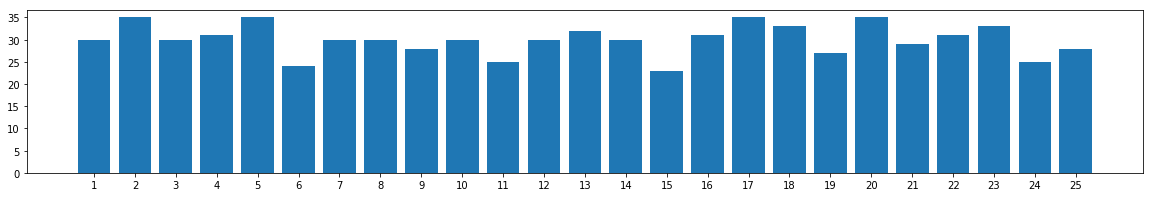

In [43]:
plt.figure(figsize=(20, 3))
plt.bar(frequencia_50_ultimos.keys(), frequencia_50_ultimos.values())
# plt.grid(True)
plt.xticks(range(1, len(frequencia_50_ultimos) + 1), frequencia_50_ultimos.keys())
plt.show()

In [44]:
concursos_10_ultimos = concursos[len(concursos) - 10:]
# imprimir_concursos(concursos_10_ultimos)

In [45]:
frequencia_10_ultimos = frequencia_concursos(concursos_10_ultimos)
print(frequencia_10_ultimos)

{1: 3, 2: 7, 3: 7, 4: 6, 5: 7, 6: 5, 7: 5, 8: 7, 9: 7, 10: 6, 11: 3, 12: 6, 13: 8, 14: 8, 15: 4, 16: 9, 17: 6, 18: 8, 19: 7, 20: 6, 21: 7, 22: 7, 23: 4, 24: 3, 25: 4}


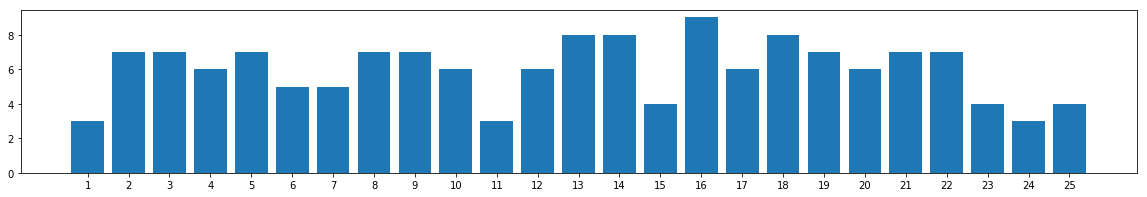

In [46]:
plt.figure(figsize=(20, 3))
plt.bar(frequencia_10_ultimos.keys(), frequencia_10_ultimos.values())
# plt.grid(True)
plt.xticks(range(1, len(frequencia_10_ultimos) + 1), frequencia_10_ultimos.keys())
plt.show()

In [47]:
atraso = atraso_concursos(concursos_50_ultimos)
print(atraso)

{1: 4, 2: 0, 3: 1, 4: 1, 5: 0, 6: 3, 7: 1, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 1, 16: 0, 17: 0, 18: 0, 19: 0, 20: 1, 21: 0, 22: 0, 23: 0, 24: 2, 25: 0}


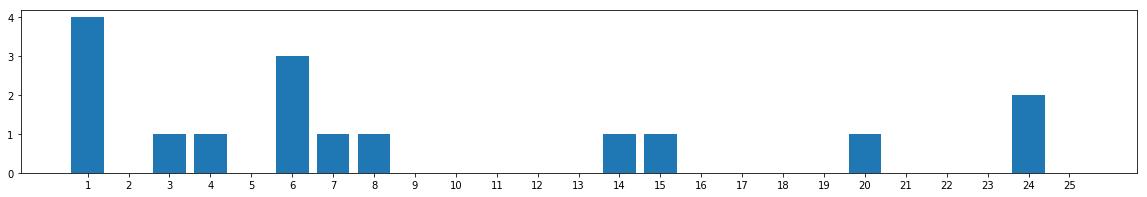

In [48]:
plt.figure(figsize=(20, 3))
plt.bar(atraso.keys(), atraso.values())
# plt.grid(True)
plt.xticks(range(1, len(atraso) + 1), atraso.keys())
plt.show()

In [49]:
def frequencia_impar_par(concursos):
    impar_par = []

    for c in concursos:
        if ([c.impar, c.par] not in impar_par):
            impar_par.append([c.impar, c.par])

    impar_par = sorted(impar_par)

    frequencia = [0] * len(impar_par)

    for c in concursos:
        for i in range(len(impar_par)):
            if (c.impar == impar_par[i][0] and c.par == impar_par[i][1]):
                frequencia[i] += 1
    
    impar_par_lst = []

    for i in impar_par:
        impar_par_lst.append(' - '.join([str(x) for x in i]))

    d = {k:v for k, v in zip(impar_par_lst, frequencia)}
    
    return d

In [50]:
freq_impar_par = frequencia_impar_par(concursos_50_ultimos)
print(freq_impar_par)

{'5 - 10': 1, '6 - 9': 8, '7 - 8': 12, '8 - 7': 17, '9 - 6': 8, '10 - 5': 4}


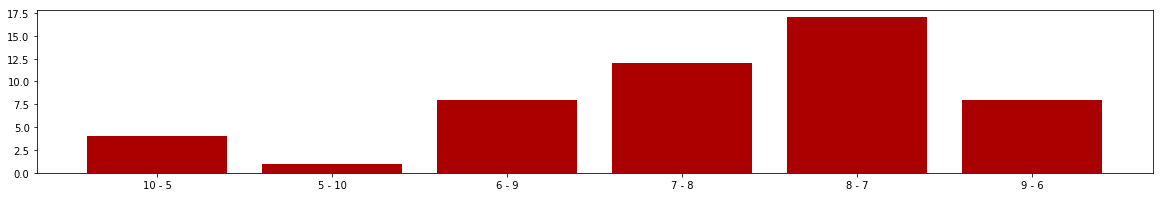

In [51]:
plt.figure(figsize=(20, 3))
plt.bar(freq_impar_par.keys(), freq_impar_par.values(), facecolor='#AA0000')
# plt.grid(True)
# plt.xticks(range(1, len(d) + 1), d.keys())
plt.show()

In [52]:
menor_sorteado = dict.fromkeys(np.arange(1,12), 0)

for c in concursos:
#     if (min(c.numeros) not in menor_sorteado):
#         menor_sorteado.append(min(c.numeros))
    menor_sorteado[min(c.numeros)] += 1
        
menor_sorteado

{1: 1031, 2: 426, 3: 171, 4: 46, 5: 29, 6: 4, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0}

In [53]:
maior_sorteado = dict.fromkeys(np.arange(15,26), 0)

for c in concursos:
#     if (min(c.numeros) not in menor_sorteado):
#         menor_sorteado.append(min(c.numeros))
    maior_sorteado[max(c.numeros)] += 1
        
maior_sorteado

{15: 0,
 16: 0,
 17: 0,
 18: 1,
 19: 3,
 20: 7,
 21: 21,
 22: 48,
 23: 177,
 24: 419,
 25: 1031}

In [54]:
def frequencia_menor_maior(concursos):
    menor_maior_sorteado_lst = []
    # dict.fromkeys(np.arange(15,26), 0)

    for c in concursos:
        if ([min(c.numeros), max(c.numeros)] not in menor_maior_sorteado_lst):
            menor_maior_sorteado_lst.append([min(c.numeros), max(c.numeros)])

    menor_maior_sorteado_lst = sorted(menor_maior_sorteado_lst)
    
    menor_maior_sorteado = [0] * len(menor_maior_sorteado_lst)

    for c in concursos:
        idx = menor_maior_sorteado_lst.index([min(c.numeros), max(c.numeros)])
        menor_maior_sorteado[idx] += 1

    menor_maior_sorteado_p = [0] * len(menor_maior_sorteado_lst)

    for i in np.arange(0, len(menor_maior_sorteado)):
        menor_maior_sorteado_p[i] = round((menor_maior_sorteado[i] * 100) / len(concursos),2)

    for (a, b, c) in zip(menor_maior_sorteado_lst, menor_maior_sorteado, menor_maior_sorteado_p):
        print(a, b, c)

In [55]:
frequencia_menor_maior(concursos_50_ultimos)

[1, 19] 1 2.0
[1, 22] 3 6.0
[1, 23] 3 6.0
[1, 24] 7 14.0
[1, 25] 16 32.0
[2, 21] 1 2.0
[2, 22] 1 2.0
[2, 23] 2 4.0
[2, 24] 3 6.0
[2, 25] 6 12.0
[3, 25] 4 8.0
[4, 25] 2 4.0
[5, 23] 1 2.0


In [56]:
# f, ax = plt.subplots()

# index = np.arange(n_groups)
# bar_width = 0.35

# ax = plt.bar(d.keys(), d.values(), color='coral', alpha= 0.8)

# plt.xlabel('Impares - Pares')
# plt.ylabel('Frequencia')
# plt.title('Frequencia Impares - Pares', fontsize = 16)
# # plt.xticks(len(d.keys()) + bar_width, d.keys())
# # plt.legend()

# for i in ax.patches:
#     ax.text(i.get_x() - .03, i.get_height() + 0.5,
#             str(round(100 * i.get_height() / sum(d.values()), 2)) + '%')

# # plt.tight_layout()
# plt.show()

In [57]:
padrao_seq = []

for c in concursos_50_ultimos:
    if (c.sequencia not in padrao_seq):
        padrao_seq.append(c.sequencia)

In [58]:
padrao_seq

[(5, 2, 6),
 (4, 3, 4),
 (3, 2, 2, 2, 2, 2, 2),
 (2, 3, 5, 2, 3),
 (3, 2, 2, 2, 3),
 (3, 3, 3, 2, 3),
 (5, 4, 2),
 (2, 2, 2, 2, 4),
 (2, 2, 3, 3, 2, 2),
 (4, 2, 4),
 (3, 2, 3, 2, 3),
 (3, 5, 2, 2),
 (4, 2, 2, 4),
 (3, 3, 2, 2, 2),
 (2, 2, 2, 2, 6),
 (2, 2, 2, 2, 3),
 (2, 2, 4, 6),
 (3, 3, 5),
 (2, 3, 5, 3),
 (3, 2, 7),
 (4, 2, 3, 3),
 (6, 4, 3),
 (3, 2, 5, 2),
 (3, 2, 3, 3, 2),
 (4, 2, 5),
 (3, 3, 4, 3),
 (2, 6, 4),
 (3, 2, 4, 3),
 (4, 2, 2, 5),
 (6, 2, 2),
 (2, 2, 3, 2, 4, 2),
 (2, 2, 2, 2, 2, 2),
 (5, 2, 4, 2, 2),
 (3, 2, 2, 4),
 (2, 3, 2, 5),
 (5, 3, 4, 2),
 (2, 2, 2, 6),
 (2, 2, 3, 4, 2),
 (2, 2, 9),
 (3, 3, 3, 5),
 (3, 4, 3, 3),
 (3, 2, 2, 6),
 (3, 8),
 (2, 6, 3),
 (4, 6, 2),
 (4, 3, 4, 2, 2),
 (5, 4, 3)]

In [59]:
def frequencia_max_sequencia(concursos):
    dic = dict.fromkeys(np.arange(2,16), 0)

    for c in concursos:
        dic[max(c.sequencia)] += 1

    return dic

In [60]:
dic_seq = frequencia_max_sequencia(concursos_50_ultimos)
dic_seq

{2: 1,
 3: 9,
 4: 13,
 5: 14,
 6: 10,
 7: 1,
 8: 1,
 9: 1,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0}

In [61]:
padrao_horizontal = []

for c in concursos:
    if(c.horizontal not in padrao_horizontal):
        padrao_horizontal.append(c.horizontal)
        
padrao_horizontal

[(3, 3, 3, 3, 3),
 (3, 3, 4, 3, 2),
 (2, 5, 3, 3, 2),
 (4, 2, 2, 4, 3),
 (3, 2, 4, 3, 3),
 (4, 3, 2, 3, 3),
 (2, 3, 3, 3, 4),
 (2, 4, 2, 5, 2),
 (3, 2, 3, 4, 3),
 (4, 4, 3, 2, 2),
 (1, 5, 2, 3, 4),
 (2, 5, 4, 3, 1),
 (3, 3, 2, 3, 4),
 (2, 4, 3, 2, 4),
 (4, 3, 2, 5, 1),
 (1, 4, 3, 4, 3),
 (2, 4, 4, 3, 2),
 (2, 5, 1, 5, 2),
 (4, 1, 2, 4, 4),
 (5, 4, 4, 0, 2),
 (4, 3, 3, 5, 0),
 (4, 2, 2, 3, 4),
 (5, 3, 2, 2, 3),
 (1, 3, 5, 2, 4),
 (2, 3, 4, 5, 1),
 (3, 3, 2, 4, 3),
 (4, 1, 3, 3, 4),
 (3, 4, 3, 3, 2),
 (3, 4, 2, 4, 2),
 (3, 1, 4, 3, 4),
 (4, 3, 3, 1, 4),
 (3, 5, 3, 1, 3),
 (1, 3, 4, 3, 4),
 (3, 1, 3, 5, 3),
 (4, 2, 4, 1, 4),
 (2, 5, 1, 4, 3),
 (3, 2, 4, 2, 4),
 (4, 2, 1, 4, 4),
 (4, 3, 2, 2, 4),
 (5, 3, 3, 2, 2),
 (2, 2, 3, 5, 3),
 (3, 2, 3, 3, 4),
 (3, 4, 3, 2, 3),
 (3, 2, 4, 1, 5),
 (3, 3, 3, 4, 2),
 (3, 4, 2, 3, 3),
 (4, 4, 3, 3, 1),
 (3, 1, 4, 4, 3),
 (3, 1, 5, 5, 1),
 (3, 4, 4, 2, 2),
 (5, 1, 1, 4, 4),
 (3, 1, 5, 3, 3),
 (2, 3, 4, 4, 2),
 (1, 3, 3, 4, 4),
 (3, 5, 2, 3, 2),
 (3, 2, 1,

In [62]:
padrao_horizontal = []

for c in concursos_50_ultimos:
    if(c.horizontal not in padrao_horizontal):
        padrao_horizontal.append(c.horizontal)
        
sorted(padrao_horizontal)

[(1, 4, 4, 4, 2),
 (2, 2, 3, 4, 4),
 (2, 3, 1, 4, 5),
 (2, 3, 3, 3, 4),
 (2, 3, 4, 2, 4),
 (2, 3, 4, 3, 3),
 (2, 4, 3, 2, 4),
 (2, 4, 3, 4, 2),
 (2, 4, 4, 4, 1),
 (3, 1, 3, 3, 5),
 (3, 2, 4, 5, 1),
 (3, 3, 1, 3, 5),
 (3, 3, 2, 4, 3),
 (3, 3, 3, 2, 4),
 (3, 3, 3, 3, 3),
 (3, 3, 3, 4, 2),
 (3, 3, 3, 5, 1),
 (3, 3, 4, 2, 3),
 (3, 4, 3, 2, 3),
 (4, 1, 2, 5, 3),
 (4, 1, 3, 3, 4),
 (4, 2, 2, 3, 4),
 (4, 2, 2, 4, 3),
 (4, 2, 3, 2, 4),
 (4, 2, 3, 3, 3),
 (4, 3, 1, 4, 3),
 (4, 3, 2, 2, 4),
 (4, 3, 2, 3, 3),
 (4, 3, 3, 2, 3),
 (4, 3, 4, 3, 1),
 (4, 4, 1, 3, 3),
 (4, 4, 1, 4, 2),
 (4, 4, 1, 5, 1),
 (4, 4, 2, 1, 4),
 (5, 1, 3, 4, 2),
 (5, 3, 4, 3, 0)]

In [63]:
cinco_primeiros = cinco_primeiros(concursos_50_ultimos)
print(cinco_primeiros)

{(1, 2, 3, 4, 6), (2, 4, 6, 7, 9), (4, 5, 6, 8, 11), (3, 4, 8, 9, 10), (3, 4, 6, 7, 10), (3, 4, 5, 7, 8), (1, 4, 5, 9, 11), (1, 2, 3, 7, 8), (2, 4, 5, 6, 9), (4, 5, 6, 8, 9), (2, 4, 5, 6, 7), (1, 2, 4, 5, 7), (3, 5, 6, 7, 10), (1, 3, 6, 8, 9), (1, 3, 4, 5, 6), (1, 2, 4, 5, 8), (1, 2, 3, 5, 8), (1, 2, 3, 5, 6), (1, 2, 3, 4, 8), (1, 2, 3, 4, 7), (1, 3, 4, 6, 7), (2, 3, 5, 6, 8), (1, 4, 5, 6, 7), (1, 4, 5, 6, 9), (2, 3, 4, 5, 8), (1, 2, 3, 4, 5), (1, 2, 5, 6, 8), (2, 3, 5, 6, 7), (1, 2, 3, 6, 7), (1, 3, 4, 5, 8), (2, 4, 7, 8, 9), (2, 4, 5, 7, 8), (5, 7, 8, 9, 10), (2, 5, 9, 10, 11), (1, 2, 4, 5, 9), (1, 2, 6, 7, 9), (2, 3, 4, 5, 7), (2, 4, 7, 9, 10), (1, 2, 3, 5, 9), (2, 3, 4, 5, 9), (1, 2, 3, 5, 7)}


In [64]:
cinco_ultimos = cinco_ultimos(concursos_50_ultimos)
print(cinco_ultimos)

{(16, 18, 19, 20, 22), (17, 18, 19, 22, 23), (19, 20, 22, 23, 25), (17, 18, 19, 22, 25), (18, 20, 23, 24, 25), (17, 19, 21, 22, 24), (18, 19, 20, 23, 24), (20, 21, 22, 23, 25), (16, 17, 21, 22, 23), (15, 17, 18, 20, 21), (21, 22, 23, 24, 25), (19, 20, 21, 22, 25), (17, 20, 21, 23, 25), (18, 19, 20, 21, 25), (17, 20, 22, 23, 25), (17, 18, 19, 20, 22), (17, 18, 23, 24, 25), (17, 18, 20, 21, 22), (17, 20, 21, 24, 25), (13, 15, 16, 18, 19), (18, 20, 21, 23, 25), (18, 21, 22, 23, 24), (18, 19, 21, 22, 25), (17, 18, 19, 23, 24), (17, 19, 20, 21, 23), (18, 20, 21, 22, 25), (19, 21, 22, 23, 25), (19, 20, 22, 23, 24), (17, 18, 21, 22, 23), (20, 21, 22, 23, 24), (20, 21, 23, 24, 25), (17, 22, 23, 24, 25), (19, 20, 21, 23, 24), (17, 18, 19, 20, 24), (17, 18, 19, 20, 23), (17, 18, 20, 24, 25), (19, 20, 23, 24, 25), (19, 20, 21, 22, 23), (18, 20, 21, 24, 25), (19, 21, 23, 24, 25), (20, 22, 23, 24, 25), (19, 21, 22, 24, 25), (16, 17, 18, 19, 22)}


In [65]:
cinco_centrais = cinco_centrais(concursos_50_ultimos)
print(cinco_centrais)

{(10, 12, 14, 15, 16), (9, 10, 12, 14, 15), (12, 14, 16, 17, 18), (7, 11, 12, 14, 16), (10, 11, 12, 15, 19), (10, 12, 13, 14, 16), (9, 10, 12, 13, 14), (8, 10, 13, 15, 16), (12, 13, 14, 15, 16), (12, 14, 15, 17, 18), (7, 9, 10, 14, 16), (11, 12, 14, 15, 16), (11, 13, 14, 16, 17), (13, 17, 18, 19, 20), (8, 12, 13, 14, 16), (8, 12, 13, 15, 16), (10, 11, 13, 14, 17), (7, 8, 10, 11, 12), (12, 13, 16, 17, 18), (7, 9, 11, 12, 13), (8, 11, 14, 16, 17), (10, 11, 13, 16, 18), (8, 11, 13, 15, 16), (7, 8, 10, 13, 15), (9, 11, 17, 18, 20), (10, 12, 13, 15, 17), (9, 11, 12, 13, 17), (8, 9, 12, 13, 14), (8, 9, 14, 16, 18), (8, 9, 12, 14, 19), (10, 12, 13, 14, 15), (13, 14, 17, 18, 20), (10, 13, 14, 15, 16), (9, 11, 12, 15, 17), (10, 11, 13, 15, 16), (9, 13, 14, 16, 18), (10, 11, 12, 15, 16), (10, 11, 13, 14, 16), (7, 8, 9, 12, 16), (10, 11, 12, 13, 14), (10, 13, 15, 17, 18), (7, 8, 10, 13, 16), (9, 12, 13, 15, 17), (10, 11, 14, 15, 16)}


In [66]:
# cinco_primeiros_v1 = []
# cinco_finais_v1 = []

# for c in concursos_50_ultimos:
#     cinco_primeiros_v1.append(c.numeros[0:6])
#     cinco_finais_v1.append(c.numeros[10:16])
        
# cinco_primeiros_v2 = set()
# [x for x in cinco_primeiros_v1 if x not in cinco_primeiros_v2 and not cinco_primeiros_v2.add(x)]

# cinco_finais_v2 = set()
# [y for y in cinco_finais_v1 if y not in cinco_finais_v2 and not cinco_finais_v2.add(y)]

# Gerar jogos

In [67]:
jogos = []

max_menor_numero = 2
jogo_id = 1
    
for a in np.arange(1, 26 - 14):
    if (a > max_menor_numero):
        break
        
    for b in np.arange(a + 1, 26 - 13):
        for c in np.arange(b + 1, 26 - 12):
            for d in np.arange(c+1, 26 - 11):
                for e in np.arange(d+1, 26 - 10):
                    for f in np.arange(e+1, 26 - 9):
                        for g in np.arange(f+1, 26 - 8):
                            for h in np.arange(g+1, 26 - 7):
                                for i in np.arange(h+1, 26 - 6):
                                    for j in np.arange(i+1, 26 - 5):
                                        for k in np.arange(j+1, 26 - 4):
                                            for l in np.arange(k+1, 26 - 3):
                                                for m in np.arange(l+1, 26 - 2):
                                                    for n in np.arange(m+1, 26 - 1):
                                                        for o in np.arange(n+1, 26 - 0):
                                                            jogo = Jogo()
                                                            num = (a, b, c, d, e, f, g, h, i, j, k, l, m, n, o)
                                                            jogo.id = jogo_id
                                                            jogo.set_numeros(num)
                                                            jogos.append(jogo)
                                                            jogo_id += 1

In [68]:
print(len(jogos))

2778446


In [69]:
imprimir_jogo(jogos[:20])
    

Total jogos: 20 

ID:  1
Tamanho: 15 | Imapres/Pares: 8/7 | Sequencia: (15,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)


ID:  2
Tamanho: 15 | Imapres/Pares: 7/8 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16)


ID:  3
Tamanho: 15 | Imapres/Pares: 8/7 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17)


ID:  4
Tamanho: 15 | Imapres/Pares: 7/8 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18)


ID:  5
Tamanho: 15 | Imapres/Pares: 8/7 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19)


ID:  6
Tamanho: 15 | Imapres/Pares: 7/8 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20)


ID:  7
Tamanho: 15 | Imapres/Pares: 8/7 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 21)


ID:  8
Tamanho: 15 | Imapres/Pares: 7/8 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 22)


ID:  9
Tamanho: 15 | Imapres/Pares: 8/7 | Sequencia: (14,)
(1, 2, 3, 4, 5, 6, 

In [ ]:
# jogos_nao_salvos = gerar_jogos(100000, menor_numero=(1,2,3,4), maior_numero=(23,24,25))
# len(jogos_nao_salvos)

In [ ]:
# a = 0

# while a < 20:
#     jogos_nao_salvos = gerar_jogos(10000, menor_numero=(1,2,3,4), maior_numero=(23,24,25))
#     salvar_jogos(jogos_nao_salvos)
#     a += 1


In [ ]:
# imprimir_jogo(jogos_nao_salvos)

In [ ]:
# start = time.time()
# salvar_jogos(jogos_nao_salvos)
# end = time.time()
# print((end - start)/60)

In [ ]:
# insert_jogo(jogos_nao_salvos[0])

# Jogos

In [ ]:
# start = time.time()
# jogos_salvos = get_all_jogos()
# end = time.time()

# print((end - start)/60)
# print(len(jogos_salvos))

In [170]:
jogos_filtrados = jogos

In [171]:
jogos_filtrados = filtrar_cinco_primeiros(jogos_filtrados, cinco_primeiros)
len(jogos_filtrados)

1107821

In [172]:
jogos_filtrados = filtrar_cinco_ultimos(jogos_filtrados, cinco_ultimos)
len(jogos_filtrados)

315403

In [173]:
jogos_filtrados = filtrar_cinco_centrais(jogos_filtrados, cinco_centrais)
len(jogos_filtrados)

25689

In [74]:
# for s in seq_final_unica:
#     jogos_filtrados = filtrar_jogo_sequencia(jogos_filtrados, s)

# len(jogos_filtrados)

In [174]:
jogos_filtrados = filtrar_jogo_menor_maior(jogos_filtrados, (1,2), (24,25))
len(jogos_filtrados)

21472

In [175]:
jogos_filtrados = filtrar_jogo_impar_par(jogos_filtrados, [7,8])
len(jogos_filtrados)

14062

In [176]:
jogos_filtrados = filtrar_jogo_por_numeros(jogos_filtrados, (6, 20), 2)
len(jogos_filtrados)

4820

In [125]:
jogos_filtrados = filtrar_jogo_notin(jogos_filtrados, (11,15))
len(jogos_filtrados)

948

In [177]:
jogos_t2 = []

for c in jogos_filtrados:
    if max(c.sequencia) < 7 or c.sequencia == None:
        jogos_t2.append(c)

In [178]:
jogos_filtrados = jogos_t2
len(jogos_filtrados)

4707

In [135]:
imprimir_jogo(jogos_filtrados)

Total jogos: 899 

ID:  194330
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 17, 20, 21, 23, 25)


ID:  194331
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 17, 20, 21, 24, 25)


ID:  194333
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 17, 20, 22, 23, 25)


ID:  194344
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 18, 19, 20, 21, 25)


ID:  194365
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 18, 20, 21, 23, 25)


ID:  194378
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 19, 20, 21, 22, 25)


ID:  194379
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 19, 20, 21, 23, 24)


ID:  194383
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 9, 12, 16, 19, 20, 22, 23, 25)


ID:  194385
Tamanho: 15 | Ima

ID:  531001
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 2, 3, 6, 7, 8, 9, 12, 13, 14, 20, 21, 22, 23, 25)


ID:  531003
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 2, 3, 6, 7, 8, 9, 12, 13, 14, 20, 21, 23, 24, 25)


ID:  531004
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 6, 7, 8, 9, 12, 13, 14, 20, 22, 23, 24, 25)


ID:  531923
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 6
(1, 2, 3, 6, 7, 8, 9, 12, 14, 19, 20, 21, 22, 23, 24)


ID:  531924
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 5
(1, 2, 3, 6, 7, 8, 9, 12, 14, 19, 20, 21, 22, 23, 25)


ID:  531926
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 2, 3, 6, 7, 8, 9, 12, 14, 19, 20, 21, 23, 24, 25)


ID:  531927
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 6, 7, 8, 9, 12, 14, 19, 20, 22, 23, 24, 25)


ID:  533320
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(1, 2, 3, 6, 7, 8, 9, 14, 16, 18, 19, 20, 21, 22, 25)


ID:  533321
Tamanho: 15 | Imapres/Pares:

ID:  1215359
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 19, 20, 22, 23, 25)


ID:  1215361
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 19, 20, 23, 24, 25)


ID:  1215368
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 20, 21, 22, 23, 25)


ID:  1215370
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 20, 21, 23, 24, 25)


ID:  1220768
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 9, 10, 12, 13, 14, 17, 18, 19, 20, 24)


ID:  1220789
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 9, 10, 12, 13, 14, 17, 18, 20, 24, 25)


ID:  1220825
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 3, 4, 5, 6, 9, 10, 12, 13, 14, 17, 20, 21, 24, 25)


ID:  1220827
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 3, 4, 5, 6, 9, 10, 12, 13, 14, 17, 20, 22, 23, 25)


ID:  1220838
Tamanho: 15

ID:  1654135
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 6
(1, 4, 5, 6, 7, 8, 9, 14, 16, 18, 19, 20, 22, 23, 25)


ID:  1654137
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 6
(1, 4, 5, 6, 7, 8, 9, 14, 16, 18, 19, 20, 23, 24, 25)


ID:  1654144
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 6
(1, 4, 5, 6, 7, 8, 9, 14, 16, 18, 20, 21, 22, 23, 25)


ID:  1654146
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 6
(1, 4, 5, 6, 7, 8, 9, 14, 16, 18, 20, 21, 23, 24, 25)


ID:  1664106
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 5
(1, 4, 5, 6, 7, 8, 12, 13, 14, 16, 17, 20, 21, 23, 25)


ID:  1664107
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(1, 4, 5, 6, 7, 8, 12, 13, 14, 16, 17, 20, 21, 24, 25)


ID:  1664109
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(1, 4, 5, 6, 7, 8, 12, 13, 14, 16, 17, 20, 22, 23, 25)


ID:  1664120
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(1, 4, 5, 6, 7, 8, 12, 13, 14, 16, 18, 19, 20, 21, 25)


ID:  1664141
Tamanho: 15 | I


ID:  2309945
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(2, 3, 5, 6, 8, 9, 13, 14, 16, 18, 19, 20, 23, 24, 25)


ID:  2309952
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(2, 3, 5, 6, 8, 9, 13, 14, 16, 18, 20, 21, 22, 23, 25)


ID:  2309954
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(2, 3, 5, 6, 8, 9, 13, 14, 16, 18, 20, 21, 23, 24, 25)


ID:  2313699
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(2, 3, 5, 6, 8, 10, 12, 13, 14, 16, 17, 20, 21, 23, 25)


ID:  2317845
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 6
(2, 3, 5, 6, 8, 12, 13, 16, 17, 18, 19, 20, 21, 23, 24)


ID:  2317849
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(2, 3, 5, 6, 8, 12, 13, 16, 17, 18, 19, 20, 22, 23, 25)


ID:  2317851
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(2, 3, 5, 6, 8, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25)


ID:  2317858
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(2, 3, 5, 6, 8, 12, 13, 16, 17, 18, 20, 21, 22, 23, 25)


ID:  2317860
Taman

### converter lista de jogos

In [131]:
jogos_df = pd.DataFrame([x.numeros for x in jogos_filtrados], index=[c.id for c in jogos_filtrados])

In [132]:
jogos_df.to_csv('apostas.csv', sep=';')

In [ ]:
# for c in jogos_filtrados:
#     sequencia = []
#     count = 0
    
#     for i in np.arange(1, len(c.numeros[1:])):
#         if c.numeros[i] == c.numeros[i - 1] + 1:
#             count += 1
#         else:
#             if count > 0:
#                 count += 1
#                 sequencia.append(count)
#                 count = 0
            
#     c.sequencia = sorted(tuple(sequencia)) 

In [ ]:
jogos_t3 = []
dezenas = np.arange(10,20)

for c in jogos_filtrados:
    if (len(set(c.numeros).intersection(dezenas)) >= 5 and len(set(c.numeros).intersection(dezenas)) <= 7):
        jogos_t3.append(c)

In [ ]:
jogos_filtrados = jogos_t3
len(jogos_filtrados)

In [ ]:
jogos_t4 = []

for c in jogos_filtrados:
    if (len(c.sequencia) >= 3 and len(c.sequencia) <= 5):
        jogos_t4.append(c)
        
len(jogos_t4)

In [ ]:
jogos_filtrados = jogos_t4
len(jogos_filtrados)

In [ ]:
# jogos_t6 = filtrar_jogo_por_numeros(jogos_t5, numeros=[19,20,21,22,23,24,25], match=7)
# len(jogos_t6)

In [202]:
apostas_selecionadas = selecionar_jogos_aposta(jogos_filtrados, 225)

Percentual jogos com 1:  74.22222222222223
Percentual jogos com 2:  25.77777777777778
Percentual jogos com 3:  0.0
Percentual jogos impar 7:  47.11111111111111
Percentual jogos impar 8:  52.888888888888886
Percentual jogos impar 9:  0.0
Sequencia 3:  19.555555555555557
Sequencia 4:  43.55555555555555
Sequencia 5:  25.77777777777778
Sequencia 6:  8.444444444444445
Sequencia 7:  0.0


In [166]:
imprimir_jogo(apostas_selecionadas)

Total jogos: 899 

ID:  1334699
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(1, 3, 4, 6, 7, 8, 12, 13, 14, 16, 19, 20, 22, 23, 25)


ID:  1220857
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 9, 10, 12, 13, 14, 18, 20, 21, 22, 25)


ID:  1093459
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 5
(1, 2, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 22, 23, 25)


ID:  1322233
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 6, 7, 8, 9, 12, 13, 14, 17, 18, 19, 20, 24)


ID:  2317858
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(2, 3, 5, 6, 8, 12, 13, 16, 17, 18, 20, 21, 22, 23, 25)


ID:  1676790
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 5
(1, 4, 5, 6, 7, 9, 13, 14, 16, 18, 19, 20, 21, 22, 25)


ID:  1089312
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(1, 2, 6, 7, 9, 10, 12, 13, 14, 16, 17, 20, 22, 23, 25)


ID:  1202985
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 8, 9, 12, 13, 14, 18, 20, 21, 24, 25)


ID: 

ID:  988215
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(1, 2, 5, 6, 8, 9, 10, 12, 13, 14, 19, 20, 22, 23, 25)


ID:  1231786
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 10, 12, 13, 14, 16, 18, 20, 21, 23, 25)


ID:  548828
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 2, 3, 6, 7, 9, 10, 12, 13, 14, 18, 19, 20, 21, 25)


ID:  1599167
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 6, 8, 9, 10, 12, 13, 14, 16, 20, 21, 22, 23, 25)


ID:  1089371
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 6, 7, 9, 10, 12, 13, 14, 16, 20, 21, 22, 23, 25)


ID:  2265514
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(2, 3, 5, 6, 7, 8, 9, 12, 13, 14, 20, 22, 23, 24, 25)


ID:  530994
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 2, 3, 6, 7, 8, 9, 12, 13, 14, 19, 20, 23, 24, 25)


ID:  2486862
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(2, 4, 5, 6, 7, 9, 10, 12, 13, 14, 19, 20, 21, 22, 25)


ID:  1174392
Tamanho: 15 |

ID:  1599106
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(1, 3, 6, 8, 9, 10, 12, 13, 14, 16, 17, 20, 21, 24, 25)


ID:  1215309
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 17, 20, 22, 23, 25)


ID:  548758
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 6, 7, 9, 10, 12, 13, 14, 17, 18, 19, 20, 24)


ID:  1664155
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(1, 4, 5, 6, 7, 8, 12, 13, 14, 16, 19, 20, 21, 23, 24)


ID:  1093455
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 6
(1, 2, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 21, 23, 24)


ID:  201742
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 8, 10, 13, 16, 19, 20, 22, 23, 25)


ID:  2294304
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(2, 3, 5, 6, 7, 10, 12, 13, 14, 16, 19, 20, 22, 23, 25)


ID:  1712157
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 5
(1, 4, 5, 6, 9, 12, 13, 16, 17, 18, 19, 20, 22, 23, 25)


ID:  1340216
Tamanho: 1

ID:  243694
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 8, 9, 12, 13, 14, 19, 20, 23, 24, 25)


ID:  2294299
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(2, 3, 5, 6, 7, 10, 12, 13, 14, 16, 19, 20, 21, 22, 25)


ID:  1215307
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 8, 12, 13, 14, 16, 17, 20, 21, 24, 25)


ID:  1603264
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 3, 6, 8, 9, 12, 13, 16, 17, 18, 20, 21, 22, 23, 25)


ID:  1220768
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 3, 4, 5, 6, 9, 10, 12, 13, 14, 17, 18, 19, 20, 24)


ID:  2486817
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(2, 4, 5, 6, 7, 9, 10, 12, 13, 14, 17, 20, 22, 23, 25)


ID:  215076
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 7, 9, 10, 14, 16, 19, 20, 23, 24, 25)


ID:  548869
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 3
(1, 2, 3, 6, 7, 9, 10, 12, 13, 14, 19, 20, 23, 24, 25)


ID:  1652733
Tamanho: 15 | 

ID:  2529356
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(2, 4, 5, 6, 9, 12, 13, 16, 17, 18, 20, 21, 22, 23, 25)


ID:  563890
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 5
(1, 2, 3, 6, 7, 12, 13, 16, 17, 18, 19, 20, 22, 23, 24)


ID:  1340219
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 3
(1, 3, 4, 6, 7, 9, 10, 12, 13, 14, 19, 20, 23, 24, 25)


ID:  1093461
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 5
(1, 2, 6, 7, 9, 12, 13, 16, 17, 18, 19, 20, 23, 24, 25)


ID:  1680551
Tamanho: 15 | Imapres/Pares: 8/7 | Max Sequencia: 4
(1, 4, 5, 6, 7, 10, 12, 13, 14, 16, 17, 20, 21, 23, 25)


ID:  369714
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 5, 6, 7, 8, 10, 13, 16, 20, 22, 23, 24, 25)


ID:  261549
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 4
(1, 2, 3, 4, 6, 9, 10, 12, 13, 14, 18, 20, 21, 23, 25)


ID:  440402
Tamanho: 15 | Imapres/Pares: 7/8 | Max Sequencia: 3
(1, 2, 3, 5, 6, 10, 12, 13, 14, 16, 17, 20, 21, 24, 25)


ID:  1093470
Tamanho: 15

In [ ]:
# seq_inicial = []
# seq_final = []

# for c in concursos_50_ultimos:
# #     if (c.numeros[0] == 1):
#     a = []

#     for n in c.numeros:
#         if n <= 5:
#             a.append(n)

#     seq_inicial.append(a)
        
# #     if (c.numeros[-1] in (24,25)):
#     b = []

#     for o in c.numeros[10:15]:
#         if o >= 20:
#             b.append(o)

#     seq_final.append(b)
        
# seq_inicial_unica = []
# seq_final_unica = []

# i = 0

# while i < len(seq_inicial):
#     if (len(seq_inicial[i]) > 1):
#         if (seq_inicial[i] not in seq_inicial_unica):
#             seq_inicial_unica.append(seq_inicial[i])
        
#     i += 1

    
# j = 0

# while j < len(seq_final):
#     if (len(seq_final[j]) > 1):
#         if (seq_final[j] not in seq_final_unica):
#             seq_final_unica.append(seq_final[j])
        
#     j += 1

In [ ]:
# print(sorted(seq_inicial_unica))
# print(sorted(seq_final_unica))

In [ ]:
tst = []

for x in sorted(seq_inicial_unica):
    txt = ', '.join([str(y) for y in x])
    tst.append(txt)

print(tst)

In [ ]:
d1 = dict([(k, 0) for k in tst])
print(d1)

In [ ]:
i = 0

while i < len(apostas):
    j = 0
    while j < len(apostas):
        if i != j:
            if len(set(apostas[i].numeros).intersection(apostas[j].numeros)) == 15:
                del apostas[j]
        j += 1
#     print(len(set(a).intersection(apostas[i])))
    i += 1

In [ ]:
par_impar_lst = []

for x in concursos:
    par_impar_lst.append([x.impar, x.par])
  
df_v2 = pd.DataFrame(par_impar_lst, columns=['impar', 'par'])
df_v2.set_index(['impar'])
# par_impar_dic = dict(par_impar_lst)
# print(par_impar_dic)

In [ ]:
df_v2_group = df_v2.groupby(['impar', 'par'])['impar'].count()

In [ ]:
df_v2_group

In [ ]:
df_v3 = pd.DataFrame(df_v2_group)

In [ ]:
df_v3['perc'] = [(x*100)/df_v2_group.values.sum() for x in df_v2_group.values]

In [ ]:
df_v3

In [ ]:
menor = []
maior = []
menor_maior_list = []
menor_maior_dict = {}
menor_maior_strg = []

In [ ]:
for x in concursos_10_ultimos:
    menor.append(x.numeros[0])
    maior.append(x.numeros[-1])
    menor_maior_list.append([x.numeros[0], x.numeros[-1]])
    menor_maior_strg.append(str(x.numeros[0]) + ' - ' + str(x.numeros[-1]))
#     menor_maior.update({str(x.numeros[0]) + ' - ' + str(x.numeros[-1]): 1})

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
menor_freq = np.histogram(menor, bins=np.arange(1,11))

In [ ]:
menor_perc = [(x * 100)/len(concursos_10_ultimos) for x in menor_freq[0]]

In [ ]:
menor_perc

In [ ]:
np.histogram(maior, bins=np.arange(15,26))

In [ ]:
menor_maior_list[:5]

In [ ]:
menor_maior_strg[:5]

In [ ]:
df_menor_maior_list = pd.DataFrame(menor_maior_list, columns=['menor', 'maior'])

In [ ]:
df_menor_maior_list.set_index(['menor', 'maior'])

In [ ]:
menor_maior_freq = df_menor_maior_list.groupby(['menor', 'maior']).count()

In [ ]:
menor_maior_freq.values

In [ ]:
menor_maior_perc = [(x*100)/len(concursos) for x in menor_maior_freq.values]

In [ ]:
df = pd.DataFrame(menor_maior_freq)

In [ ]:
df['percentual'] = menor_maior_perc

In [ ]:
df

In [ ]:
df_menor_maior_str = pd.DataFrame(menor_maior_strg, columns=['col'])

In [ ]:
menor_maior_group = df_menor_maior_str.groupby('col')['col'].count()

In [ ]:
df_v1 = pd.DataFrame(menor_maior_group)

In [ ]:
df_v1

In [ ]:
# plt.hist(df_v1)
# plt.show()

In [ ]:
# np.histogram(menor_maior)

In [ ]:
# plt.hist([menor, maior], bins=np.arange(1,26))
# plt.xlabel('Menor Numero Sorteado')
# plt.ylabel('Frequencia')
# plt.grid(True)
# plt.show()

In [ ]:
# gravar_jogo(apostas)

In [ ]:
# from __future__ import print_function
 
# import MySQLdb as my
 
# try:
 
#     db = my.connect(host="127.0.0.1",
#                     user="root",
#                     passwd="",
#                     db="world"
#                     )
 
#     cursor = db.cursor()
 
#     sql = "select * from city where id < 10"
#     number_of_rows = cursor.execute(sql)
 
#     print(cursor.fetchone())  # fetch the first row only
 
#     db.close()
 
# except my.DataError as e:
#     print("DataError")
#     print(e)
 
# except my.InternalError as e:
#     print("InternalError")
#     print(e)
 
# except my.IntegrityError as e:
#     print("IntegrityError")
#     print(e)
 
# except my.OperationalError as e:
#     print("OperationalError")
#     print(e)
 
# except my.NotSupportedError as e:
#     print("NotSupportedError")
#     print(e)
 
# except my.ProgrammingError as e:
#     print("ProgrammingError")
#     print(e)
 
# except :
#     print("Unknown error occurred")

# Conferencia

In [ ]:
def verificar_apostas(data_sorteio):
    try:
        concurso
        
    except Exception as ex:
        print(ex)
    

# Teste

In [ ]:
total = 0

for jogo in jogos:
    for c in concursos:
        if len(set(jogo.numeros).intersection(c.numeros)) == 15:
#             print("Concurso: ", c.id)
#             print("ID Aposta: ", jogo.id)
#             print("Data Sorteio: ", c.data_sorteio)
#             print(jogo.numeros)
#             print(c.numeros)
#             print("\n")
            total += 1
            break
            
print('total jogos ganahdores: %s' % (total))

### imprimir jogos

In [84]:
# !pip install reportlab

    100% |████████████████████████████████| 3.1MB 4.5MB/s ta 0:00:011
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.units import cm
from reportlab.graphics.shapes import Rect
from reportlab.lib.colors import black

In [216]:
file_name = 'apostas.pdf'
lar = 60
alt = 37

c = canvas.Canvas(file_name, pagesize=(969, 2197))
c.setFillColor(black)
c.setFont('Helvetica', 24)

xc = 154  # constante da diferenca entre cada espaco em x
x1 = 100
x2 = x1 + xc
x3 = x2 + xc + 10
x4 = x3 + xc + 10
x5 = x4 + xc

yc = 58

jogos_pagina = 1
pagina = 1

for a in apostas_selecionadas[180:225]:
    if jogos_pagina == 1:
        y1 = 1650
        
        if len(a.numeros) == 15:
            xn = x1
        
        c.drawString(20, 20, 'pagina: ' + str(pagina))
        c.rect(xn, 685, lar, alt, fill=True, stroke=False) # 15 jogos
        
    y2 = y1 - yc
    y3 = y2 - yc
    y4 = y3 - yc
    y5 = y4 - yc
    
    for n in a.numeros:
        if n == 1:
            c.rect(x5, y1, lar, alt, fill=True, stroke=False) # 1
        
        if n == 2:
            c.rect(x5, y2, lar, alt, fill=True, stroke=False) # 2
            
        if n == 3:
            c.rect(x5, y3, lar, alt, fill=True, stroke=False) # 3
            
        if n == 4:
            c.rect(x5, y4, lar, alt, fill=True, stroke=False) # 4
            
        if n == 5:
            c.rect(x5, y5, lar, alt, fill=True, stroke=False) # 5
            
        if n == 6:
            c.rect(x4, y1, lar, alt, fill=True, stroke=False) # 6
            
        if n == 7:
            c.rect(x4, y2, lar, alt, fill=True, stroke=False) # 7
            
        if n == 8:
            c.rect(x4, y3, lar, alt, fill=True, stroke=False) # 8
            
        if n == 9:
            c.rect(x4, y4, lar, alt, fill=True, stroke=False) # 9
            
        if n == 10:
            c.rect(x4, y5, lar, alt, fill=True, stroke=False) # 10
            
        if n == 11:
            c.rect(x3, y1, lar, alt, fill=True, stroke=False) # 11
            
        if n == 12:
            c.rect(x3, y2, lar, alt, fill=True, stroke=False) # 12
            
        if n == 13:
            c.rect(x3, y3, lar, alt, fill=True, stroke=False) # 13
            
        if n == 14:
            c.rect(x3, y4, lar, alt, fill=True, stroke=False) # 14
            
        if n == 15:
            c.rect(x3, y5, lar, alt, fill=True, stroke=False) # 15
            
        if n == 16:
            c.rect(x2, y1, lar, alt, fill=True, stroke=False) # 16
            
        if n == 17:
            c.rect(x2, y2, lar, alt, fill=True, stroke=False) # 17
            
        if n == 18:
            c.rect(x2, y3, lar, alt, fill=True, stroke=False) # 18
            
        if n == 19:
            c.rect(x2, y4, lar, alt, fill=True, stroke=False) # 19
            
        if n == 20:
            c.rect(x2, y5, lar, alt, fill=True, stroke=False) # 20
            
        if n == 21:
            c.rect(x1, y1, lar, alt, fill=True, stroke=False) # 21
            
        if n == 22:
            c.rect(x1, y2, lar, alt, fill=True, stroke=False) # 22
            
        if n == 23:
            c.rect(x1, y3, lar, alt, fill=True, stroke=False) # 23
            
        if n == 24:
            c.rect(x1, y4, lar, alt, fill=True, stroke=False) # 24
            
        if n == 25:
            c.rect(x1, y5, lar, alt, fill=True, stroke=False) # 25
            
    jogos_pagina += 1
    y1 = y5 - 84
    
    if jogos_pagina > 3:
        c.showPage()
        jogos_pagina = 1
        pagina += 1
        
c.save()